## Assignment By

* **Muhammad Raaid Khan**
* **PGD Batch-05**

# Admission Predictions (Regression)

In [156]:
import os
import warnings
warnings.filterwarnings('ignore')

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [157]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [158]:
df =pd.read_csv('/tf/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [159]:
df.shape

(500, 9)

In [160]:
df.drop(columns = ['Serial No.'],inplace=True)  # Remove un-necessary column

In [161]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [162]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [163]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit '].values

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [165]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
153,324,105,3,3.0,4.0,8.75,0
84,340,115,5,4.5,4.5,9.45,1
310,320,104,3,3.0,3.5,8.74,1
494,301,99,3,2.5,2.0,8.45,1
126,323,113,3,4.0,3.0,9.32,1
...,...,...,...,...,...,...,...
343,305,103,2,2.5,3.5,8.13,0
359,321,107,2,2.0,1.5,8.44,0
323,305,102,2,2.0,2.5,8.18,0
280,311,102,3,4.5,4.0,8.64,1


In [166]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,328,115,4,4.5,4.0,9.16,1
29,310,99,2,1.5,2.0,7.30,0
471,311,103,3,2.0,4.0,8.09,0
344,295,96,2,1.5,2.0,7.34,0
54,322,110,3,3.0,3.5,8.00,0
...,...,...,...,...,...,...,...
308,312,108,3,3.5,3.0,8.53,0
171,334,117,5,4.0,4.5,9.07,1
457,295,99,1,2.0,1.5,7.57,0
75,329,114,2,2.0,4.0,8.56,1


In [167]:
y_train

array([0.79, 0.94, 0.76, 0.68, 0.85, 0.92, 0.85, 0.59, 0.63, 0.52, 0.9 ,
       0.77, 0.73, 0.51, 0.78, 0.75, 0.55, 0.83, 0.62, 0.5 , 0.72, 0.96,
       0.67, 0.88, 0.67, 0.87, 0.83, 0.44, 0.61, 0.61, 0.57, 0.94, 0.9 ,
       0.52, 0.84, 0.7 , 0.89, 0.82, 0.81, 0.61, 0.8 , 0.42, 0.54, 0.43,
       0.73, 0.45, 0.54, 0.54, 0.78, 0.48, 0.89, 0.9 , 0.79, 0.52, 0.93,
       0.94, 0.89, 0.89, 0.71, 0.8 , 0.84, 0.42, 0.94, 0.64, 0.51, 0.74,
       0.53, 0.87, 0.77, 0.67, 0.64, 0.61, 0.9 , 0.85, 0.74, 0.71, 0.89,
       0.76, 0.79, 0.88, 0.66, 0.48, 0.71, 0.75, 0.73, 0.66, 0.64, 0.52,
       0.8 , 0.63, 0.79, 0.95, 0.77, 0.55, 0.78, 0.78, 0.79, 0.69, 0.83,
       0.64, 0.49, 0.65, 0.85, 0.93, 0.74, 0.84, 0.79, 0.91, 0.72, 0.85,
       0.71, 0.76, 0.91, 0.82, 0.61, 0.67, 0.96, 0.76, 0.45, 0.66, 0.49,
       0.76, 0.72, 0.81, 0.78, 0.78, 0.61, 0.67, 0.82, 0.65, 0.59, 0.68,
       0.77, 0.72, 0.64, 0.62, 0.72, 0.8 , 0.53, 0.92, 0.82, 0.74, 0.82,
       0.71, 0.59, 0.8 , 0.58, 0.7 , 0.73, 0.66, 0.

In [168]:
y_test

array([0.78, 0.54, 0.64, 0.47, 0.7 , 0.88, 0.57, 0.72, 0.84, 0.64, 0.79,
       0.56, 0.92, 0.79, 0.73, 0.52, 0.62, 0.81, 0.57, 0.65, 0.93, 0.65,
       0.86, 0.87, 0.97, 0.65, 0.57, 0.95, 0.91, 0.74, 0.85, 0.81, 0.73,
       0.39, 0.8 , 0.79, 0.73, 0.65, 0.58, 0.75, 0.94, 0.71, 0.86, 0.78,
       0.87, 0.56, 0.62, 0.95, 0.93, 0.62, 0.81, 0.74, 0.84, 0.96, 0.46,
       0.88, 0.64, 0.9 , 0.78, 0.71, 0.64, 0.73, 0.47, 0.93, 0.75, 0.68,
       0.78, 0.34, 0.83, 0.9 , 0.94, 0.73, 0.71, 0.87, 0.64, 0.79, 0.59,
       0.7 , 0.95, 0.92, 0.64, 0.65, 0.91, 0.73, 0.91, 0.76, 0.54, 0.68,
       0.76, 0.68, 0.72, 0.67, 0.67, 0.94, 0.93, 0.77, 0.86, 0.8 , 0.64,
       0.84, 0.57, 0.62, 0.94, 0.53, 0.64, 0.69, 0.65, 0.63, 0.57, 0.47,
       0.57, 0.89, 0.8 , 0.86, 0.65, 0.63, 0.71, 0.61, 0.56, 0.72, 0.86,
       0.76, 0.44, 0.62, 0.71, 0.74, 0.71, 0.38, 0.62, 0.82, 0.46, 0.79,
       0.68, 0.67, 0.48, 0.9 , 0.73, 0.92, 0.77, 0.73, 0.7 , 0.47, 0.49,
       0.57, 0.71, 0.69, 0.89, 0.37, 0.72, 0.84])

## Which Scaler to Use

* It you know upper and lower limit of feature, Use **Min Max Scaler** (i.e for GRE and TOEFL we know upper and lower limit)
* Otherwise, use **Standard Scaler**.

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)  # fit_transform for training > Since the Model is seeing Data for First Time
X_test = scaler.transform(X_test)        # transform for testing      > The Model has already seen the Train Data

In [170]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [171]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu', input_dim=7), 
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  
])

In [172]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 7)                 56        
                                                                 
 dense_54 (Dense)            (None, 7)                 56        
                                                                 
 dense_55 (Dense)            (None, 7)                 56        
                                                                 
 dense_56 (Dense)            (None, 7)                 56        
                                                                 
 dense_57 (Dense)            (None, 1)                 8         
                                                                 
Total params: 232 (928.00 Byte)
Trainable params: 232 (928.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [174]:
history=model.fit(X_train,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
9/9 [==============================] - 1s 19ms/step - loss: 0.5327 - val_loss: 0.4302
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4337 - val_loss: 0.3340
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.3324 - val_loss: 0.2437
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2380 - val_loss: 0.1641
Epoch 5/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1540 - val_loss: 0.0967
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0839 - val_loss: 0.0468
Epoch 7/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0379 - val_loss: 0.0233
Epoch 8/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0191 - val_loss: 0.0221
Epoch 9/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0176 - val_loss: 0.0238
Epoch 10/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0173 - val_loss: 0.0208
Epoch 11/500
9/9 [==========

In [175]:
y_pred=model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [176]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
r2_score(y_test,y_pred)

0.8073229607933438

In [177]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [178]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Mean Absolute Error (MAE): 0.04744728887875875
Mean Squared Error (MSE): 0.003994833854181754


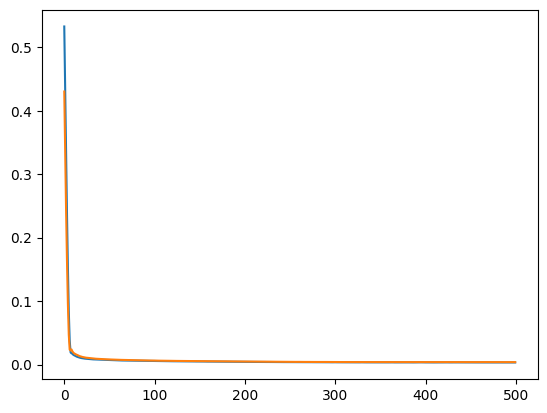

In [179]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])